In [ ]:
#Please check the dataset in the below google drive since dataset was too big it was creating issue in git 
#so kept the dataset in the google drive under shared folder 
# https://drive.google.com/file/d/1BLmkNYpdCWW8d-rUH57WMH1eMUcC06D9/view?usp=drive_link


In [6]:
pip install scikit-learn

   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------------- -------------------------- 3.7/11.0 MB 21.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 34.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import os
#from library.sb_utils import save_file



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

import os

from library.sb_utils import save_file

In [40]:
fraud_data = pd.read_csv(r'C:\Users\mange\repo\DataScienceGuidedCapstone\Capstone2\fraudTrain.csv')

In [41]:
#Call the info method  to see a summary of the data
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Index                  1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [42]:
#Call the head method to print the first several rows of the data
fraud_data.head()

,Index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,1/1/2019 0:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,...,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,1/1/2019 0:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,1/1/2019 0:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,...,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,1/1/2019 0:01,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,1/1/2019 0:03,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,...,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [43]:
fraud_data.drop(fraud_data.columns[:1], axis=1, inplace=True)
fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.078800,-81.178100,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.887800,-118.210500,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.180800,-112.262000,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.230600,-112.113800,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.420700,-79.462900,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [9]:
#converting trans_date_trans_time into datetime
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
print(fraud_data.dtypes['trans_date_trans_time'])
fraud_data.head()

datetime64[ns]


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [44]:
#dtypes of the columns
fraud_data.dtypes

trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [45]:
#number of unique values in the dataset
fraud_data.nunique()

trans_date_trans_time     476595
cc_num                       320
merchant                     693
category                      14
amt                        48602
first                        348
last                         479
gender                         2
street                       965
city                         879
state                         51
zip                          952
lat                          950
long                         951
city_pop                     865
job                          493
dob                          950
trans_num                1048575
unix_time                1030650
merch_lat                1016437
merch_long               1034825
is_fraud                       2
dtype: int64

In [14]:
# deriving additonal columns from 'trans_date_trans_time'
#deriving hour
fraud_data['trans_hour'] = fraud_data['trans_date_trans_time'].dt.hour
#deriving 'day of the week'
fraud_data['trans_day_of_week'] = fraud_data['trans_date_trans_time'].dt.dayofweek + 1
fraud_data['trans_day_of_week'] = fraud_data['trans_day_of_week'].astype(int)
#deriving 'year_month'
fraud_data['trans_year_month'] = fraud_data['trans_date_trans_time'].dt.to_period('M')

fraud_data.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,trans_day_of_week,trans_year_month
0,2019-01-01 00:00:00,2.700000e+15,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",3/9/1988,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,2,2019-01
1,2019-01-01 00:00:00,6.300000e+11,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,6/21/1978,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,2,2019-01
2,2019-01-01 00:00:00,3.890000e+13,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1/19/1962,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,2,2019-01
3,2019-01-01 00:01:00,3.530000e+15,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1/12/1967,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,2,2019-01
4,2019-01-01 00:03:00,3.760000e+14,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,3/28/1986,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,2,2019-01


In [48]:
#Getting the Age of a coustomer from the Date of Birth column
fraud_data['dob'] = pd.to_datetime(fraud_data['dob'])
fraud_data['trans_date_trans_time'] = pd.to_datetime(fraud_data['trans_date_trans_time'])
fraud_data['age'] = ((fraud_data['trans_date_trans_time'] - fraud_data['dob']).dt.days / 365.25).astype(int)

fraud_data['age'].head()

0    30
1    40
2    56
3    51
4    32
Name: age, dtype: int64

In [49]:
#dropping variables which are not usefull for the Visualization and analytics
fraud_data.drop(['trans_date_trans_time','first', 'last', 'dob'] , axis=1, inplace=True)
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30
1,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40
2,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56
3,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,51
4,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,32


In [50]:
#checking the dataset info
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1048575 non-null  float64
 1   merchant    1048575 non-null  object 
 2   category    1048575 non-null  object 
 3   amt         1048575 non-null  float64
 4   gender      1048575 non-null  object 
 5   street      1048575 non-null  object 
 6   city        1048575 non-null  object 
 7   state       1048575 non-null  object 
 8   zip         1048575 non-null  int64  
 9   lat         1048575 non-null  float64
 10  long        1048575 non-null  float64
 11  city_pop    1048575 non-null  int64  
 12  job         1048575 non-null  object 
 13  trans_num   1048575 non-null  object 
 14  unix_time   1048575 non-null  int64  
 15  merch_lat   1048575 non-null  float64
 16  merch_long  1048575 non-null  float64
 17  is_fraud    1048575 non-null  int64  
 18  age         1048575 no

In [19]:
#converting data types that should be categorical into "category"

fraud_data['category'] = fraud_data['category'].astype('category')
fraud_data['gender'] = fraud_data['gender'].astype('category')
fraud_data['is_fraud'] = fraud_data['is_fraud'].astype('category')

fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype    
---  ------             --------------    -----    
 0   cc_num             1048575 non-null  float64  
 1   merchant           1048575 non-null  object   
 2   category           1048575 non-null  category 
 3   amt                1048575 non-null  float64  
 4   gender             1048575 non-null  category 
 5   street             1048575 non-null  object   
 6   city               1048575 non-null  object   
 7   state              1048575 non-null  object   
 8   zip                1048575 non-null  int64    
 9   lat                1048575 non-null  float64  
 10  long               1048575 non-null  float64  
 11  city_pop           1048575 non-null  int64    
 12  job                1048575 non-null  object   
 13  trans_num          1048575 non-null  object   
 14  unix_time          1048575 non-null  int64    
 15

In [51]:
#determing the shape of the dataset
fraud_data.shape

(1048575, 19)

In [52]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [25]:
# scientific notation values
#fraud_data['amt'] = fraud_data['amt'].apply(lambda x: '{:.6f}'.format(x))

In [53]:
#describing the dataset
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [54]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [55]:
fraud_data['amt'] = pd.to_numeric(fraud_data['amt'], errors='coerce')

In [56]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [57]:
fraud_data['cc_num'] = pd.to_numeric(fraud_data['cc_num'], errors='coerce')

In [58]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [59]:
# Step 2: Format the column to six decimal places (display only)
fraud_data['cc_num'] = fraud_data['cc_num'].apply(lambda x: '{:.6f}'.format(x) if pd.notnull(x) else x)

# Optional: Convert back to float if needed
fraud_data['cc_num'] = fraud_data['cc_num'].astype(float)

In [60]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [61]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1048575 non-null  float64
 1   merchant    1048575 non-null  object 
 2   category    1048575 non-null  object 
 3   amt         1048575 non-null  float64
 4   gender      1048575 non-null  object 
 5   street      1048575 non-null  object 
 6   city        1048575 non-null  object 
 7   state       1048575 non-null  object 
 8   zip         1048575 non-null  int64  
 9   lat         1048575 non-null  float64
 10  long        1048575 non-null  float64
 11  city_pop    1048575 non-null  int64  
 12  job         1048575 non-null  object 
 13  trans_num   1048575 non-null  object 
 14  unix_time   1048575 non-null  int64  
 15  merch_lat   1048575 non-null  float64
 16  merch_long  1048575 non-null  float64
 17  is_fraud    1048575 non-null  int64  
 18  age         1048575 no

In [62]:
fraud_data.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,age
0,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,F,561 Perry Cove,Moravian Falls,NC,28654,36.078800,-81.178100,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,30
1,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.887800,-118.210500,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,40
2,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,M,594 White Dale Suite 530,Malad City,ID,83252,42.180800,-112.262000,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,56
3,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.230600,-112.113800,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,51
4,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,M,408 Bradley Rest,Doe Hill,VA,24433,38.420700,-79.462900,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,32


In [27]:
#Temporarily Disable Scientific Notation for Display
with pd.option_context('display.float_format', '{:.6f}'.format):
    display(fraud_data.head())

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1/1/2019 0:00,2700000000000000.000000,"fraud_Rippin, Kub and Mann",misc_net,4.970000,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.078800,-81.178100,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1/1/2019 0:00,630000000000.000000,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.230000,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.887800,-118.210500,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,1/1/2019 0:00,38900000000000.000000,fraud_Lind-Buckridge,entertainment,220.110000,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.180800,-112.262000,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,1/1/2019 0:01,3530000000000000.000000,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.000000,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.230600,-112.113800,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,1/1/2019 0:03,376000000000000.000000,fraud_Keeling-Crist,misc_pos,41.960000,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.420700,-79.462900,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [63]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [64]:
# Temporarily set global float format to display all values in standard decimal notation
pd.options.display.float_format = '{:,.0f}'.format  # No decimal places, standard notation

# Run `describe()` to view without scientific notation
print(fraud_data.describe())

# Reset to default to avoid affecting other outputs
#pd.reset_option('display.float_format')

                         cc_num       amt       zip       lat      long  \
count                 1,048,575 1,048,575 1,048,575 1,048,575 1,048,575   
mean    417,179,950,519,735,232        70    48,802        39       -90   
std   1,308,892,727,784,082,688       160    26,898         5        14   
min              60,416,207,185         1     1,257        20      -166   
25%         180,000,000,000,000        10    26,237        35       -97   
50%       3,520,000,000,000,000        47    48,174        39       -87   
75%       4,640,000,000,000,000        83    72,042        42       -80   
max   4,990,000,000,000,000,000    28,949    99,783        67       -68   

       city_pop     unix_time  merch_lat  merch_long  is_fraud       age  
count 1,048,575     1,048,575  1,048,575   1,048,575 1,048,575 1,048,575  
mean     89,058 1,344,905,833         39         -90         0        45  
std     302,435    10,196,997          5          14         0        17  
min          23 1,325,37

In [65]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,"1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575","1,048,575"
mean,"417,179,950,519,735,232",70,"48,802",39,-90,"89,058","1,344,905,833",39,-90,0,45
std,"1,308,892,727,784,082,688",160,"26,898",5,14,"302,435","10,196,997",5,14,0,17
min,"60,416,207,185",1,"1,257",20,-166,23,"1,325,376,018",19,-167,0,13
25%,"180,000,000,000,000",10,"26,237",35,-97,743,"1,336,682,353",35,-97,0,32
50%,"3,520,000,000,000,000",47,"48,174",39,-87,"2,456","1,344,901,521",39,-87,0,43
75%,"4,640,000,000,000,000",83,"72,042",42,-80,"20,328","1,354,366,012",42,-80,0,56
max,"4,990,000,000,000,000,000","28,949","99,783",67,-68,"2,906,700","1,362,931,730",68,-67,1,95


In [66]:
# Set global float format to standard decimal notation without commas
pd.options.display.float_format = '{:.0f}'.format  # No decimal places, no commas

# Display the `describe()` output
print(fraud_data.describe())

                   cc_num     amt     zip     lat    long  city_pop  \
count             1048575 1048575 1048575 1048575 1048575   1048575   
mean   417179950519735232      70   48802      39     -90     89058   
std   1308892727784082688     160   26898       5      14    302435   
min           60416207185       1    1257      20    -166        23   
25%       180000000000000      10   26237      35     -97       743   
50%      3520000000000000      47   48174      39     -87      2456   
75%      4640000000000000      83   72042      42     -80     20328   
max   4990000000000000000   28949   99783      67     -68   2906700   

       unix_time  merch_lat  merch_long  is_fraud     age  
count    1048575    1048575     1048575   1048575 1048575  
mean  1344905833         39         -90         0      45  
std     10196997          5          14         0      17  
min   1325376018         19        -167         0      13  
25%   1336682353         35         -97         0      32  


In [67]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,417179950519735232,70,48802,39,-90,89058,1344905833,39,-90,0,45
std,1308892727784082688,160,26898,5,14,302435,10196997,5,14,0,17
min,60416207185,1,1257,20,-166,23,1325376018,19,-167,0,13
25%,180000000000000,10,26237,35,-97,743,1336682353,35,-97,0,32
50%,3520000000000000,47,48174,39,-87,2456,1344901521,39,-87,0,43
75%,4640000000000000,83,72042,42,-80,20328,1354366012,42,-80,0,56
max,4990000000000000000,28949,99783,67,-68,2906700,1362931730,68,-67,1,95


In [68]:
# Set global float format to six decimal places without scientific notation
pd.options.display.float_format = '{:.6f}'.format  # Six decimal places, standard notation

# Display the `describe()` output
print(fraud_data.describe())

                          cc_num            amt            zip            lat  \
count             1048575.000000 1048575.000000 1048575.000000 1048575.000000   
mean   417179950519735232.000000      70.279095   48801.590604      38.533364   
std   1308892727784082688.000000     159.951841   26898.040351       5.076852   
min           60416207185.000000       1.000000    1257.000000      20.027100   
25%       180000000000000.000000       9.640000   26237.000000      34.620500   
50%      3520000000000000.000000      47.450000   48174.000000      39.354300   
75%      4640000000000000.000000      83.050000   72042.000000      41.940400   
max   4990000000000000000.000000   28948.900000   99783.000000      66.693300   

                long       city_pop         unix_time      merch_lat  \
count 1048575.000000 1048575.000000    1048575.000000 1048575.000000   
mean      -90.226256   89057.759063 1344905832.778656      38.533463   
std        13.758582  302435.057620   10196997.483775 

In [69]:
fraud_data.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000,1048575.000000
mean,417179950519735232.000000,70.279095,48801.590604,38.533364,-90.226256,89057.759063,1344905832.778656,38.533463,-90.226477,0.005728,45.386577
std,1308892727784082688.000000,159.951841,26898.040351,5.076852,13.758582,302435.057620,10196997.483775,5.111233,13.770929,0.075465,17.380873
min,60416207185.000000,1.000000,1257.000000,20.027100,-165.672300,23.000000,1325376018.000000,19.027785,-166.671242,0.000000,13.000000
25%,180000000000000.000000,9.640000,26237.000000,34.620500,-96.798000,743.000000,1336682353.000000,34.729540,-96.898639,0.000000,32.000000
50%,3520000000000000.000000,47.450000,48174.000000,39.354300,-87.476900,2456.000000,1344901521.000000,39.362945,-87.439226,0.000000,43.000000
75%,4640000000000000.000000,83.050000,72042.000000,41.940400,-80.158000,20328.000000,1354366012.000000,41.956021,-80.232279,0.000000,56.000000
max,4990000000000000000.000000,28948.900000,99783.000000,66.693300,-67.950300,2906700.000000,1362931730.000000,67.510267,-66.950902,1.000000,95.000000


In [70]:
# Use observed=True to match the future default behavior
fraud_percentage = 100 * fraud_data.groupby('is_fraud', observed=True).size() / len(fraud_data)
fraud_percentage

is_fraud
0   99.427223
1    0.572777
dtype: float64

In [71]:
#looking at distribution of amount
pd.concat(
    [fraud_data['amt'].describe(percentiles = [0.5,0.95,0.999]).reset_index().rename(columns={'index': 'Row Type', 'amt':'Total Amount Distribution'}),
     fraud_data.loc[fraud_data['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Non-Fraud Amount Distribution'}),
     fraud_data.loc[fraud_data['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999]).reset_index(drop = 1).rename(columns={'amt':'Fraud Amount Distribution'})], axis=1)

,Row Type,Total Amount Distribution,Non-Fraud Amount Distribution,Fraud Amount Distribution
0,count,1048575.000000,1042569.000000,6006.000000
1,mean,70.279095,67.627445,530.573492
2,std,159.951841,153.695606,391.333069
3,min,1.000000,1.000000,1.180000
4,50%,47.450000,47.220000,391.165000
5,95%,196.260000,189.940000,1085.052500
6,99.9%,1496.830880,1502.239520,1289.066100
7,max,28948.900000,28948.900000,1371.810000


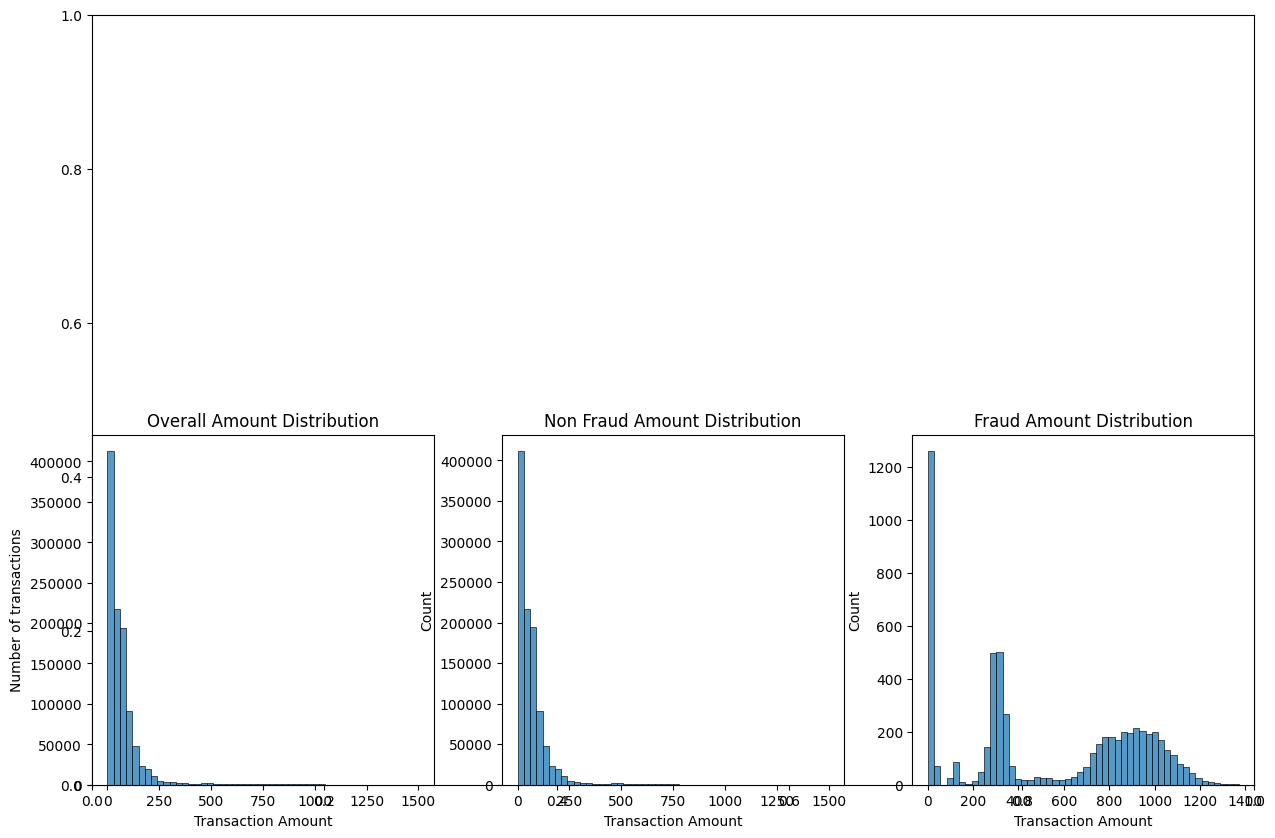

In [72]:
#plotting the above distributions
fig = plt.subplots(figsize=(15,10))

plots = []
#plotting the amt feature

#distribution plots
plots.append(sns.histplot(fraud_data[fraud_data.amt <= 1500].amt, bins=50, ax=plt.subplot(234)))
plots.append(sns.histplot(fraud_data[(fraud_data.is_fraud==0) & (fraud_data.amt<=1500)].amt, bins=50, ax=plt.subplot(235)))
plots.append(sns.histplot(fraud_data[(fraud_data.is_fraud==1) & (fraud_data.amt<=1500)].amt, bins=50, ax=plt.subplot(236)))

#setting titles
plots[0].set_title('Overall Amount Distribution')
plots[1].set_title('Non Fraud Amount Distribution')
plots[2].set_title('Fraud Amount Distribution')

#setting x labels
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')

#setting y label
plots[0].set_ylabel('Number of transactions')

plt.show()

In [73]:
# save the data to a new csv file
datapath = '../Capstone2/data'
save_file(fraud_data, 'fraud_data_cleaned.csv', datapath)

Writing file.  "../Capstone2/data\fraud_data_cleaned.csv"
